In [2]:
# pedir nombre y crear un archivo con el nombre del usuario
nombre = input("Dijite su nombre")
name_file = "{}.txt".format(nombre)
file = open(name_file,'a')
file.write("\n "+"El cultivo es de " + nombre)
file.close()

In [1]:
# creo el archivo vacio PASO 1
nombre = input("¿Cual es su nombre? :")

def crear_archivo(nombre):
   name_file = "{}.txt".format(nombre)
   file = open(name_file,'a')
   file.close()
   return name_file

name_file = crear_archivo(nombre)

In [2]:
#Agregar datos a txt PASO 2
def guardar_datos(nombre_file, datos_dia):
   file = open(nombre_file,'a')
   file.write(str(datos_dia) + "\n")
   file.close()

In [3]:
#generar datos random PASO 3
import random
def crear_datos_random(nombre_file):
   for i in range (1,32):
      fecha = (2022,3,i)
      area_cultivo = random.randint(1,4)
      fresa_total = random.randint(1,1000)
      fresa_calidad = random.randint(1,fresa_total)
      datos = [fecha, area_cultivo, fresa_total, fresa_calidad]
      guardar_datos(nombre_file,datos)
   print(datos)

crear_datos_random(name_file)

[(2022, 3, 31), 2, 610, 181]


In [ ]:
#Leer archivos linea por linea

In [33]:
# leer archivo linea por linea
print(name_file)
file = open(name_file,'r')
lineas = file.readlines()
file.close()
print(lineas)

juan.txt
['\n', ' El cultivo es de juan\n', ' El cultivo es de juan\n', ' El cultivo es de juan']


In [ ]:
# leer archivo linea por linea
file = open(name_file, 'r')
for linea in file:
   print(linea)
file.close()

In [ ]:
#lectura y limpieza de datos
def lectura_datos(name_file, zona=None, fecha_inicial=None, fecha_final=None):
	file = open(name_file, "r")
	#print(palabra.read())
	for linea in file:
		n = list(linea.strip('([]\n').split('),'))
		print(n)
		if fecha_inicial != None :
			fecha = list(n[0].split(',')) # lista fecha
			datos = list(n[1].split(',')) # lista datos
			#if fecha_inicial < fecha  || fecha < fecha_final:
			#	pass#continuar aca con las condiciones para el rango de las fechas
	file.close()
	print(n) #lista tratada y dividida en fecha y datos
	fecha = list(n[0].split(',')) # lista fecha
	datos = list(n[1].split(',')) # lista datos
	print(fecha)
	print(datos)
	print(int(datos[1]))
	print("---------------------------------------------")
	return fecha,datos

a,n =lectura_datos(name_file)


In [8]:
#lectura - limpieza de datos - y busqueda por zona y fecha PASO 4
def lectura_datos(name_file, zona=None, fecha_inicial=None, fecha_final=None):
	file = open(name_file, "r")
	#zonas =int (input("Escriba la zona:"))
	#print(palabra.read())
	fecha_grafico = []
	dato_total_grafico = []
	dato_calidad_grafico = []
	for linea in file:
		n = list(linea.strip('([]\n').split('),'))
		#print(type(n[0]))
		fecha = list(n[0].split(',')) # lista fecha
		datos = list(n[1].split(',')) # lista datos
		#print(fecha)
		fecha = list(map(int,fecha)) #lista a int
		datos = list(map(int,datos))#Lisya a int datos
		union = fecha+datos
		#print(type(fecha[0]))
		zonas=union[3]
		#busqueda por zona
		#graficos
		if zona != None:
			if zona==zonas:
				print(union)
				fecha_grafico.append(n[0])
				#print(fecha_grafico)
				resta = union[4]-union[5]
				dato_total_grafico.append(resta)
				#print(dato_total_grafico)
				un = union[5]
				dato_calidad_grafico.append(un)
				#print(dato_calidad_grafico)
		elif fecha_inicial != None and fecha_final != None:
			#print("Hola")
			if fecha_inicial >= fecha or  fecha <= fecha_final:
				print(union)
				fecha_grafico.append(n[0])
				#print(fecha_grafico)
				resta = union[4]-union[5]
				dato_total_grafico.append(resta)
				#print(dato_total_grafico)
				un = union[5]
				dato_calidad_grafico.append(un)
				#print(dato_calidad_grafico)
			elif fecha > fecha_final :
				break
		else:
			print("Busqueda Vacia")
	return fecha_grafico, dato_total_grafico, dato_calidad_grafico

#a,n =lectura_datos(name_file)
#f = fecha , dt = dato_total_grafico, dc = dato_calidad_grafico
f,dt,dc = lectura_datos(name_file, #zona=4)
            fecha_inicial=[2022, 3, 1],
            fecha_final=[2022, 3, 10])
print("_________________________________")
#print(f[0].replace(', ', "-"))
print(f)
print(dt)
print(dc)

[2022, 3, 1, 1, 82, 80]
[2022, 3, 2, 1, 922, 676]
[2022, 3, 3, 1, 687, 536]
[2022, 3, 4, 3, 454, 440]
[2022, 3, 5, 4, 325, 286]
[2022, 3, 6, 4, 531, 345]
[2022, 3, 7, 2, 521, 62]
[2022, 3, 8, 1, 139, 137]
[2022, 3, 9, 4, 338, 110]
[2022, 3, 10, 1, 360, 79]
_________________________________
['2022, 3, 1', '2022, 3, 2', '2022, 3, 3', '2022, 3, 4', '2022, 3, 5', '2022, 3, 6', '2022, 3, 7', '2022, 3, 8', '2022, 3, 9', '2022, 3, 10']
[2, 246, 151, 14, 39, 186, 459, 2, 228, 281]
[80, 676, 536, 440, 286, 345, 62, 137, 110, 79]


In [9]:
#Convertir la fecha a formato año-mes-dia PASO 5
def convertir_fecha(fecha):
   fecha_modificada = []
   for i in range(0,len(fecha)):
      modificado = fecha[i].replace(', ', "-")
      fecha_modificada.append(modificado)
   return fecha_modificada

print(convertir_fecha(f))

['2022-3-1', '2022-3-2', '2022-3-3', '2022-3-4', '2022-3-5', '2022-3-6', '2022-3-7', '2022-3-8', '2022-3-9', '2022-3-10']


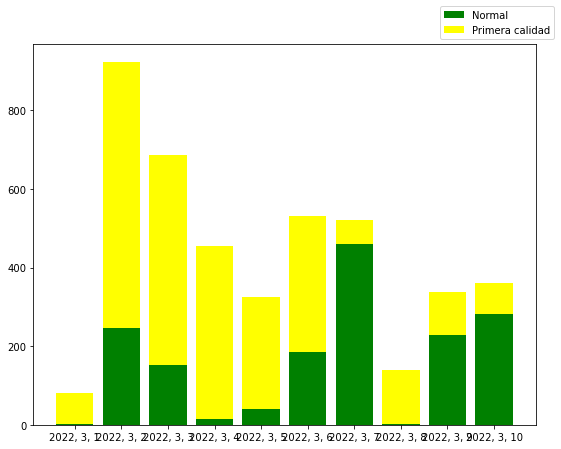

In [10]:
# graficar datos PASO 6
import matplotlib.pyplot as plt
import numpy as np

def graficar(fecha_zona, total, calidad):
	plt.figure(figsize=(9,7))
	plt.bar(fecha_zona,total,color="green",label="Normal")
	plt.bar(fecha_zona,calidad,color="yellow",bottom=np.array(total),label="Primera calidad")
	#plt.bar(year,data1,color="red",bottom=np.array(data3)+np.array(data2),label="C++")
	plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))

graficar(f,dt,dc)

In [29]:
# validacion de rango de fechas
a = [2021, 3, 11]
b = [2021, 3, 10]

if a > b:
   print("yes")
else:
   print("false")

yes


In [15]:
import random
random.randint(1,5)
datos = [[]]


In [13]:
dic = {'a':1,'b' : 2, 'c' : 3 , 'd':4, 'a':3}
dic.setdefault('a')

for nota in dic.keys():
   print("{} obtuvo".format(nota))

a obtuvo
b obtuvo
c obtuvo
d obtuvo
